<a href="https://colab.research.google.com/github/AndresMontesDeOca/Redes_Neuronales/blob/main/Clase_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clase 2, Practica Personal


In [17]:
ColabNotebook = 'google.colab' in str(get_ipython())

if ColabNotebook: # maquina virtual colab
    # monta G-drive en entorno COLAB
    from google.colab import drive
    drive.mount('/content/drive/')

    # carpeta donde se encuentran archivos .py auxiliares
    FUENTES_DIR = '/content/drive/MyDrive/Colab Notebooks/Redes_Neuronales/Fuentes/'
    DATOS_DIR = '/content/drive/MyDrive/Colab Notebooks/Redes_Neuronales/Data/'      # carpeta donde se encuentran los datasets
else: # maquina local ipython
    # configuración para notebook con instalación LOCAL
    FUENTES_DIR = '../Fuentes' # carpeta donde se encuentran archivos .py auxiliares
    DATOS_DIR   = '../Datos/'  # carpeta donde se encuentran los datasets

# agrega ruta de busqueda donde tenemos archivos .py
import sys
sys.path.append(FUENTES_DIR)

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


## Ejercicio 1

Funcion:


x/(2*x**2 + 3*y**2 + 1)

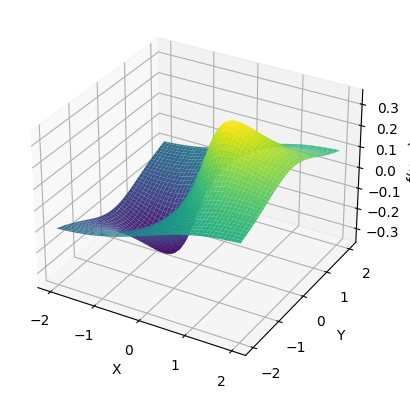

Derivada parcial con respecto a x:


-4*x**2/(2*x**2 + 3*y**2 + 1)**2 + 1/(2*x**2 + 3*y**2 + 1)

Derivada parcial con respecto a y:


-6*x*y/(2*x**2 + 3*y**2 + 1)**2

In [18]:
import sympy as sp
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# Definir las variables
x, y = sp.symbols('x y')

# Definir la función
f = x / (2*x**2 + 3*y**2 + 1)

# Convertir la función a una función que pueda ser evaluada numéricamente
f_lambdified = sp.lambdify((x, y), f, 'numpy')

# Funcion
print('Funcion:')
display(f)

# Crear una cuadrícula de puntos (x, y)
x_vals = np.linspace(-2, 2, 100)
y_vals = np.linspace(-2, 2, 100)
x_grid, y_grid = np.meshgrid(x_vals, y_vals)
z_vals = f_lambdified(x_grid, y_grid)

# Crear la gráfica
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Graficar la superficie
ax.plot_surface(x_grid, y_grid, z_vals, cmap='viridis')

# Añadir etiquetas a los ejes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('f(x, y)')

# Mostrar la gráfica
plt.show()

# Calcular las derivadas parciales
df_dx = sp.diff(f, x)
df_dy = sp.diff(f, y)

# Mostrar las derivadas parciales
print('Derivada parcial con respecto a x:')
display(df_dx)

print('Derivada parcial con respecto a y:')
display(df_dy)

In [19]:
# A)
# coordenadas del punto a calcular
(px, py) = (1, -1)

# evalua la derivada de la funcion f respecto de x en el punto (x e y)
pz = f.evalf(subs = {x:px, y:py})
print(f"\n en {px}, {py} la funcion vale {pz}\n")


dpx = df_dx.evalf(subs = {x:px, y:py} )
print(f"La derivada respecto de x en {px}, {py} vale {dpx}\n")


dpy = df_dy.evalf(subs = {x:px,y:py} )
print(f"La derivada respecto de x en {px}, {py} vale {dpy}\n")

# Mostrar el vector gradiente
gradient = (dpx, dpy)
print('El vector gradiente en (1, -1) es:', gradient)


 en 1, -1 la funcion vale 0.166666666666667

La derivada respecto de x en 1, -1 vale 0.0555555555555556

La derivada respecto de x en 1, -1 vale 0.166666666666667

El vector gradiente en (1, -1) es: (0.0555555555555556, 0.166666666666667)


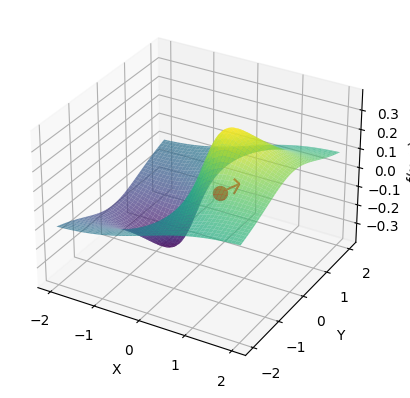

In [20]:
# Plot

# Crear la gráfica
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Graficar la superficie
ax.plot_surface(x_grid, y_grid, z_vals, cmap='viridis', alpha=0.7)

# Punto en el cual se evaluará el gradiente
x_point, y_point = 1, -1
z_point = f_lambdified(x_point, y_point)

# Graficar el punto
ax.scatter(x_point, y_point, z_point, color='red', s=100)

# Graficar el vector gradiente
ax.quiver(x_point, y_point, z_point, dpx, dpy, 0, color='red', length=0.5, normalize=True)

# Añadir etiquetas a los ejes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('f(x, y)')

# Mostrar la gráfica
plt.show()



In [21]:
# B)

px2, py2 = 0.2, -1

dpx2 = df_dx.evalf(subs = {x:px2, y:py2} )
print(f"La derivada respecto de x en {px2}, {py2} vale {dpx2}\n")

dpy2 = df_dy.evalf(subs = {x:px2,y:py2} )
print(f"La derivada respecto de x en {px2}, {py2} vale {dpy2}\n")

# Vector gradiente
gradient = (dpx2, dpy2)
gradient


La derivada respecto de x en 0.2, -1 vale 0.235486351403306

La derivada respecto de x en 0.2, -1 vale 0.0720876585928489



(0.235486351403306, 0.0720876585928489)

In [22]:
# Analizar el signo de los componentes del vector gradiente
if dpx2 > 0 and dpy2 > 0:
    direccion = "Incrementar los valores de x y y"
elif dpx2 < 0 and dpy2 < 0:
    direccion = "Disminuir los valores de x y y"
elif dpx2 > 0 and dpy2 < 0:
    direccion = "Incrementar el valor de x y disminuir el de y"
elif dpx2 < 0 and dpy2 > 0:
    direccion = "Disminuir el valor de x e incrementar el de y"

direccion


'Incrementar los valores de x y y'

In [23]:
# C)

# Calcular el módulo del vector gradiente
grad_x = float(dpx2)
grad_y = float(dpy2)
grad_norm = np.sqrt(grad_x**2 + grad_y**2)
print('Modulo del vectror gradiente:', grad_norm)

# Definir alpha
alpha = 0.1

# Calcular el desplazamiento
delta_x = alpha * grad_x
delta_y = alpha * grad_y

# Calcular la nueva posición
x_new = 0.20 + delta_x
y_new = -1 + delta_y
print('Nueva posicion:', (x_new, y_new))


Modulo del vectror gradiente: 0.24627312524642364
Nueva posicion: (0.22354863514033066, -0.9927912341407151)


In [24]:
# D)

# elif dpx2 < 0 and dpy2 < 0:
    # direccion = "Disminuir los valores de x y y"




In [25]:
# E)

# Calcular el módulo del vector gradiente
grad_x = float(dpx2)
grad_y = float(dpy2)
grad_norm = np.sqrt(grad_x**2 + grad_y**2)
print('Modulo del vectror gradiente:', grad_norm)

# Definir alpha
alpha = 0.1

# Calcular el desplazamiento
delta_x = -1 * alpha * grad_x
delta_y = -1 * alpha * grad_y

# Calcular la nueva posición
x_new = 0.20 + delta_x
y_new = -1 + delta_y
print('Nueva posicion:', (x_new, y_new))


Modulo del vectror gradiente: 0.24627312524642364
Nueva posicion: (0.17645136485966936, -1.007208765859285)


In [26]:
# F)

# Definir el número de iteraciones
iterations = 100

# Convertir las derivadas parciales a funciones que puedan ser evaluadas numéricamente
df_dx_lambdified = sp.lambdify((x, y), df_dx, 'numpy')
df_dy_lambdified = sp.lambdify((x, y), df_dy, 'numpy')

# Implementar el bucle de descenso de gradiente
for _ in range(iterations):
    # Calcular las derivadas parciales en el punto actual
    grad_x = df_dx_lambdified(px2, py2)
    grad_y = df_dy_lambdified(px2, py2)

    # Actualizar los valores de x y y
    x_val = px2 - alpha * grad_x
    y_val = py2 - alpha * grad_y

# Calcular el valor de la función en el mínimo
f_lambdified = sp.lambdify((x, y), f, 'numpy')
f_min = f_lambdified(x_val, y_val)

(x_val, y_val, f_min)

(0.17645136485966936, -1.007208765859285, 0.04297739286708402)

In [27]:
# G)

# Definir el número de iteraciones
iterations = 100

# Convertir las derivadas parciales a funciones que puedan ser evaluadas numéricamente
df_dx_lambdified = sp.lambdify((x, y), df_dx, 'numpy')
df_dy_lambdified = sp.lambdify((x, y), df_dy, 'numpy')

# Implementar el bucle de descenso de gradiente
for _ in range(iterations):
    # Calcular las derivadas parciales en el punto actual
    grad_x = df_dx_lambdified(px2, py2)
    grad_y = df_dy_lambdified(px2, py2)

    # Actualizar los valores de x y y
    x_val = px2 + alpha * grad_x
    y_val = py2 + alpha * grad_y

# Calcular el valor de la función en el mínimo
f_lambdified = sp.lambdify((x, y), f, 'numpy')
f_min = f_lambdified(x_val, y_val)

(x_val, y_val, f_min)

(0.22354863514033066, -0.9927912341407151, 0.05510397578158922)

In [28]:
# F pero sin usar sympy


# Definir la función
def f(x, y):
    return x / (2*x**2 + 3*y**2 + 1)

# Definir las derivadas parciales
def df_dx(x, y):
    return (1 - 4*x**2) / (2*x**2 + 3*y**2 + 1)**2

def df_dy(x, y):
    return -6*x*y / (2*x**2 + 3*y**2 + 1)**2

# Inicializar los valores de x y y
x_val = 0.20
y_val = -1.0

# Definir la tasa de aprendizaje
alpha = 0.1

# Definir el número de iteraciones
iterations = 100

# Implementar el bucle de descenso de gradiente
for _ in range(iterations):
    # Calcular las derivadas parciales en el punto actual
    grad_x = df_dx(x_val, y_val)
    grad_y = df_dy(x_val, y_val)

    # Actualizar los valores de x y y en la dirección opuesta al gradiente
    x_val -= alpha * grad_x
    y_val -= alpha * grad_y

# Calcular el valor de la función en el mínimo
f_min = f(x_val, y_val)

print("Ubicación del mínimo:", (x_val, y_val))
print("Valor de la función en el mínimo:", f_min)


Ubicación del mínimo: (-0.2466456226470665, -0.9309676202153754)
Valor de la función en el mínimo: -0.06627104997917425


## Ejercicio 2

In [29]:
def P(j, k):
    return k**2 - 2*j*k + 2*j**2 + 18*j - 20*k + 201

def dP_dj(j, k):
    # Derivada parcial de P con respecto a j
    return -2*k + 4*j + 18

def dP_dk(j, k):
    # Derivada parcial de P con respecto a k
    return 2*k - 2*j - 20

# Valores iniciales de j y k
j_val = 0.0
k_val = 0.0

# Tasa de aprendizaje
alpha = 0.1

# Número de iteraciones
iterations = 100

for _ in range(iterations):
    # Calcular las derivadas parciales en el punto actual
    grad_j = dP_dj(j_val, k_val)
    grad_k = dP_dk(j_val, k_val)

    # Actualizar los valores de j y k en la dirección opuesta al gradiente
    j_val -= alpha * grad_j
    k_val -= alpha * grad_k

# Calcular el valor de la función en los valores actuales de j y k
P_min = P(j_val, k_val)

print("Ubicación del mínimo: (j, k) =", (j_val, k_val))
print("Valor de la función en el mínimo:", P_min)


Ubicación del mínimo: (j, k) = (0.9981619399021535, 10.997025956288319)
Valor de la función en el mínimo: 100.00000466892371


## Ejercicio 3

In [30]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

data = {
    "Horas de Entrenamiento": [2, 3, 4, 4, 5, 6, 6, 7, 7, 8, 10, 10],
    "Tiempo Promedio (min)": [30.5, 29.3, 26.7, 26.0, 25.5, 24.7, 23.5, 23.0, 22.5, 21.0, 21.0, 20.5]
}

df = pd.DataFrame(data)

correlacion = df["Horas de Entrenamiento"].corr(df["Tiempo Promedio (min)"])
print(f'Coeficiente de correlación de Pearson: {correlacion}')


Coeficiente de correlación de Pearson: -0.959746386006859


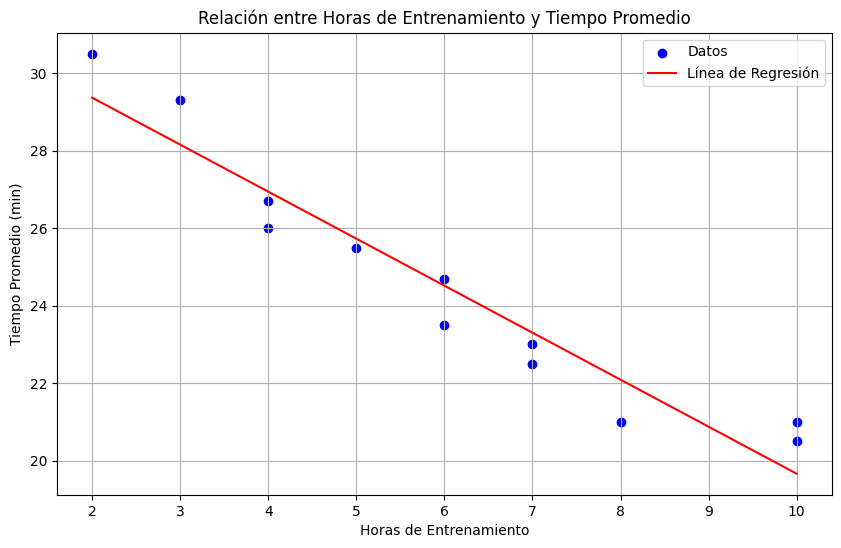

Coeficiente de la regresión: -1.2125000000000001
Intercepto de la regresión: 31.791666666666664


In [31]:
# Usando LinearRegression de Scikit Learn
# Gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(df["Horas de Entrenamiento"], df["Tiempo Promedio (min)"], color='blue', label='Datos')
plt.title('Relación entre Horas de Entrenamiento y Tiempo Promedio')
plt.xlabel('Horas de Entrenamiento')
plt.ylabel('Tiempo Promedio (min)')
plt.grid(True)

# Ajuste de una línea de regresión
X = df[["Horas de Entrenamiento"]]
y = df["Tiempo Promedio (min)"]
reg = LinearRegression().fit(X, y)
y_pred = reg.predict(X)

plt.plot(X, y_pred, color='red', label='Línea de Regresión')
plt.legend()

plt.show()

# Mostrar coeficientes de la recta de regresión
print(f'Coeficiente de la regresión: {reg.coef_[0]}')
print(f'Intercepto de la regresión: {reg.intercept_}')


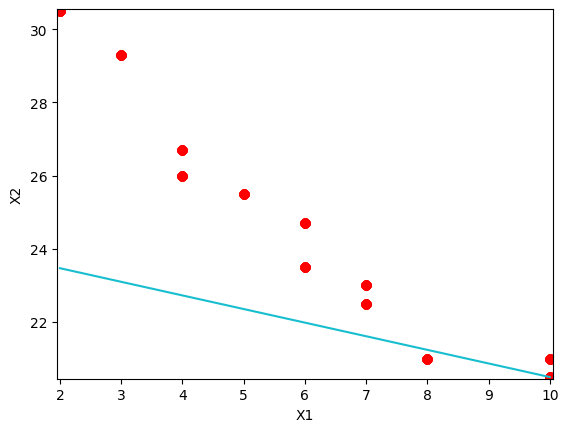

Pesos de la Neurona:
  w = -0.37191611532308766
  b = 24.21416643490897


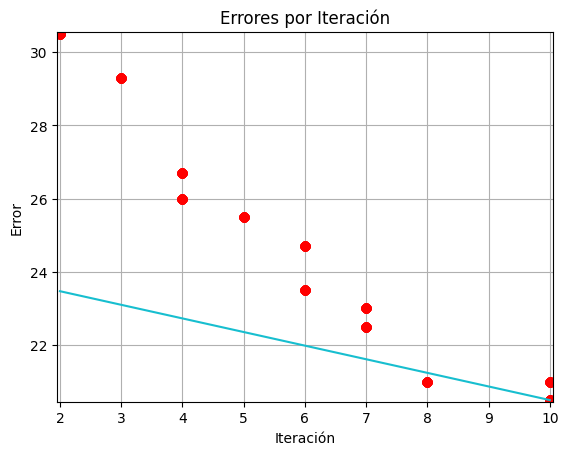

Tiempo promedio predicho para 9 horas de entrenamiento: 20.86692139700118 minutos


In [32]:
# Usando NeuronaLineal
from ClassNeuronaLineal import NeuronaLineal

data = df.copy()

# print(data.info())
# display(data)

# Separo las Variables del Target, ojo las shapes
X = data['Horas de Entrenamiento'].values.reshape(-1, 1)
y = data['Tiempo Promedio (min)'].values # Ojo con esto, si no le mando el reshape hay que ver el formato de las salidas
print(X.shape, y.shape)

# Hyperparametros del Modelo
alpha = 0.01
iter = 100
cotaE = 0.0001
draw = 1
title = ['Horas Entrenamiento', 'Timepo Carrera']

# Instancio y Entreno
modelo = NeuronaLineal(alpha, iter, cotaE, draw, title)
modelo.fit(X, y)

# imprime pesos
print('Pesos de la Neurona:')
print('  w =', modelo.w_[0])
print('  b =', modelo.b_)

# grafica errores
plt.plot(range(len(modelo.errors_)), [err for err in modelo.errors_], marker='o', linestyle='-', color='b')
plt.title('Errores por Iteración')
plt.xlabel('Iteración')
plt.ylabel('Error')
plt.grid(True)
plt.show()

# Predicccion 9hs de entrenamiento
horas_entrenamiento = [9]
tiempo_promedio_predicho = modelo.predict(horas_entrenamiento)
print(f'Tiempo promedio predicho para 9 horas de entrenamiento: {tiempo_promedio_predicho} minutos')

In [33]:
# D)

# Datos de entrenamiento
horas_entrenamiento = np.array([2, 3, 4, 4, 5, 6, 6, 7, 7, 8, 10, 10])
tiempo = np.array([30.5, 29.3, 26.7, 26.0, 25.5, 24.7, 23.5, 23.0, 22.5, 21.0, 21.0, 20.5])

# Inicializar los parámetros de la regresión (pendiente b1 e intercepto b0)
b0 = 0
b1 = 0

# Parámetros de SGD
learning_rate = 0.01  # Tasa de aprendizaje
epochs = 10000  # Número de iteraciones

# Número de ejemplos
n = len(horas_entrenamiento)

# Función para predecir y_hat
def predict(horas, b0, b1):
    return b0 + b1 * horas

# Algoritmo de Descenso de Gradiente Estocástico
for epoch in range(epochs):
    for i in range(n):
        # Seleccionar una observación aleatoria
        rand_index = np.random.randint(0, n)

        # Obtener los valores de esa observación
        x_i = horas_entrenamiento[rand_index]
        y_i = tiempo[rand_index]

        # Predecir el valor
        y_pred = predict(x_i, b0, b1)

        # Calcular el error
        error = y_pred - y_i

        # Calcular el gradiente
        gradient_b0 = error
        gradient_b1 = error * x_i

        # Actualizar los parámetros
        b0 = b0 - learning_rate * gradient_b0
        b1 = b1 - learning_rate * gradient_b1

# Mostrar los coeficientes de la regresión
print(f'Coeficiente de la regresión (b1): {b1}')
print(f'Intercepto de la regresión (b0): {b0}')


# E)

# Horas de entrenamiento
horas_entrenamiento = 9

# Predicción del tiempo promedio
tiempo_promedio_predicho = b0 + b1 * horas_entrenamiento
print(f'Tiempo promedio predicho para 9 horas de entrenamiento: {tiempo_promedio_predicho} minutos')

Coeficiente de la regresión (b1): -1.2869668179163458
Intercepto de la regresión (b0): 31.769420881455474
Tiempo promedio predicho para 9 horas de entrenamiento: 20.186719520208364 minutos


## Ejercicio 4

In [34]:
from sklearn.metrics import mean_squared_error

data = pd.read_csv(DATOS_DIR + 'CCPP.csv')

print(data.info())
display(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB
None


,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [35]:


# Extract the relevant columns for the analysis
AT = data['AT']  # Independent variable (Temperature)
PE = data['PE']  # Dependent variable (Energy Output)

# Define the linear models as given in the problem
models = {
    'a': {'W': -2.00, 'b': 500},
    'b': {'W': -2.21, 'b': 498},
    'c': {'W': -2.30, 'b': 497},
    'd': {'W': -2.22, 'b': 496.5},
    'e': {'W': -2.16, 'b': 496.91}
}

# Calculate MSE for each model and store the results in a dictionary
mse_results = []

for key, model in models.items():
    # print(model)
    W, b = model['W'], model['b']
    predictions = W * AT + b  # Calculate the predicted values using the linear model
    mse = mean_squared_error(PE, predictions)  # Calculate the Mean Squared Error (MSE)
    # mse_results[key] = mse  # Store the MSE in the dictionary
    mse_results.append((key, mse))

# # Sort the results by MSE to find the models with the lowest errors
# sorted_mse = sorted(mse_results.items(), key=lambda item: item[1])

data_results = pd.DataFrame(mse_results, columns=['Model', 'MSE']).set_index('Model').sort_values(by='MSE')
display(data_results[:2])


,MSE
Model,
e,29.448487
b,29.557129


In [36]:
# Usando NeuronaLineal

X = data[['AT']].values.reshape(-1, 1)  # Seleccionar la columna 'AT' como entrada
y = data['PE'].values  # Seleccionar la columna 'PE' como salida

# 4. Evaluar diferentes combinaciones de pesos y sesgos
combinations = [
    {"W": -2.00, "b": 500},
    {"W": -2.21, "b": 498},
    {"W": -2.30, "b": 497},
    {"W": -2.22, "b": 496.5},
    {"W": -2.16, "b": 496.91}
]

errors = []

# Hyperparametros del Modelo
alpha = 0.01
iter = 100
cotaE = 0.0001
draw = 1
title = ['AT', 'PE']


# Probar cada combinación y calcular el error cuadrático medio
for combo in combinations:
    W = combo["W"]
    b = combo["b"]
    # Crear un modelo de neurona lineal
    model = NeuronaLineal(alpha, iter, cotaE, draw, title)
    model.w_ = W
    model.b_ = b
    # print(W)
    # print(b)
    # Predecir usando el modelo
    y_pred = model.predict(X)
    # Calcular el error cuadrático medio
    mse = mean_squared_error(y, y_pred)
    errors.append((combo, mse))

# # Ordenar las combinaciones por error (MSE)
# errors.sort(key=lambda x: x[1])

# # 5. Mostrar las dos combinaciones con menor error
# for combo, mse in errors[:2]:
#     print(f"Combinación: W={combo['W']}, b={combo['b']}, Error Cuadrático Medio (MSE): {mse:.2f}")

data_results = pd.DataFrame(errors, columns=['Model', 'MSE']).set_index('Model').sort_values(by='MSE')
display(data_results[:2])


,MSE
Model,
"{'W': -2.16, 'b': 496.91}",29.448487
"{'W': -2.21, 'b': 498}",29.557129


## Ejercicio 5

In [37]:
data = pd.read_csv(DATOS_DIR + 'automobile-simple.csv')[['engine-size', 'price']]

print(data.info())
display(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   engine-size  205 non-null    int64  
 1   price        201 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 3.3 KB
None


,engine-size,price
0,130,13495.0
1,130,16500.0
2,152,16500.0
3,109,13950.0
4,136,17450.0


In [38]:
# A)
data['price'].fillna(value=data['price'].mean(), inplace=True)
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   engine-size  205 non-null    int64  
 1   price        205 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 3.3 KB
None


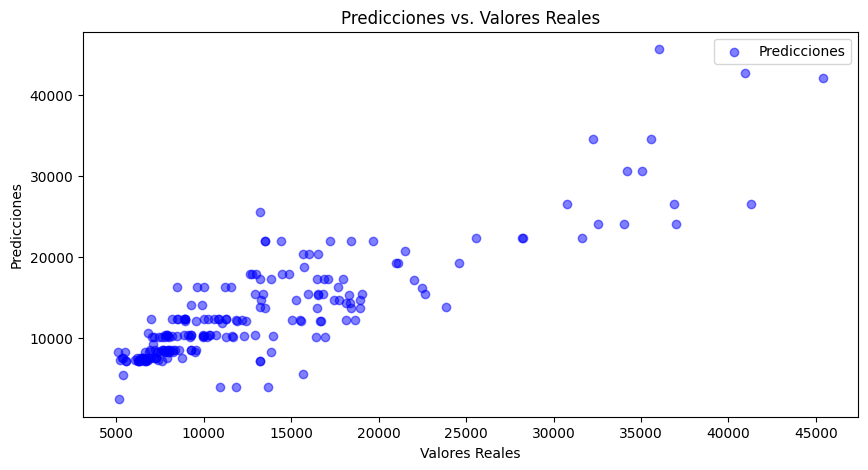

MSE sin normalización: 15858780.53973065


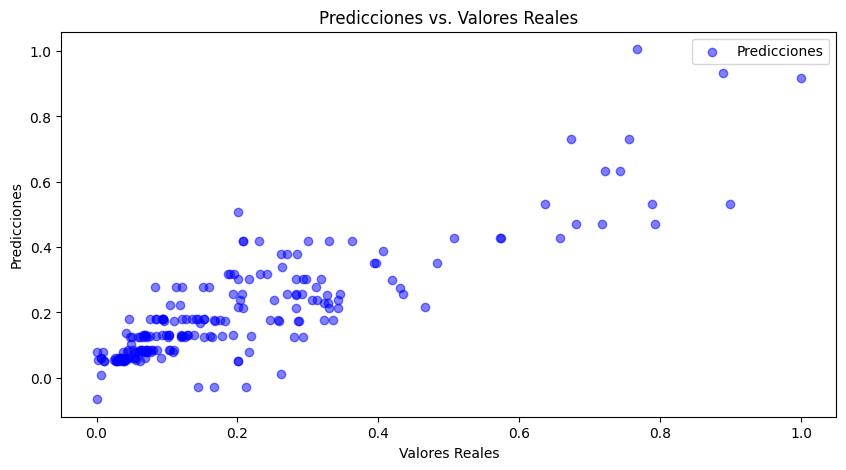

MSE con normalización Min-Max: 0.009773446477278493


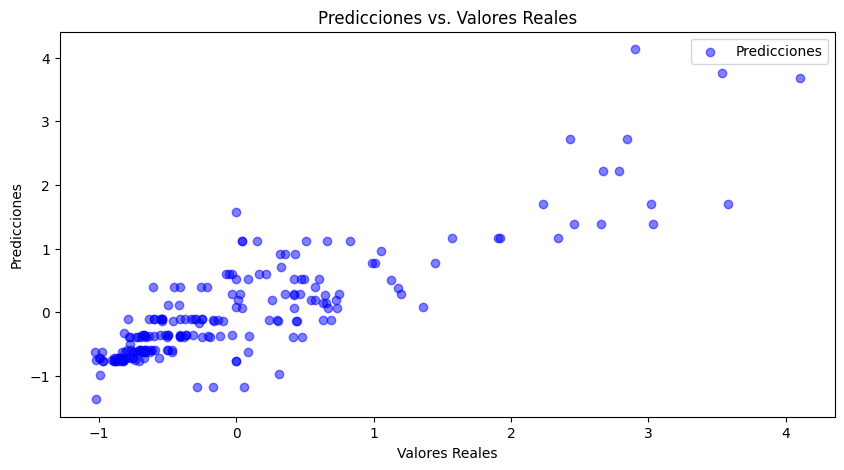

MSE con normalización estándar: 0.2573830705021929


In [40]:
# Usando Scikit Learn

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler


# Asumir que 'price' es la variable objetivo y el resto son características
X = data.drop('price', axis=1)
y = data['price']

# Función para entrenar y evaluar el modelo
def train_and_evaluate(X, y):
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)

    plt.figure(figsize=(10, 5))
    plt.scatter(y, y_pred, alpha=0.5, color='blue', label='Predicciones')
    plt.title('Predicciones vs. Valores Reales')
    plt.xlabel('Valores Reales')
    plt.ylabel('Predicciones')
    plt.legend()
    plt.show()
    return mse

# 1. Sin normalizar los atributos
mse1 = train_and_evaluate(X, y)
print(f'MSE sin normalización: {mse1}')

# 2. Normalizando atributos linealmente (Min-Max Normalization)
scaler_minmax = MinMaxScaler()
X_minmax = scaler_minmax.fit_transform(X)
y_minmax = scaler_minmax.fit_transform(y.values.reshape(-1, 1))
mse2 = train_and_evaluate(X_minmax, y_minmax)
print(f'MSE con normalización Min-Max: {mse2}')

# 3. Normalizando atributos usando media y desviación estándar (Standardization)
scaler_standard = StandardScaler()
X_standard = scaler_standard.fit_transform(X)
y_standard = scaler_standard.fit_transform(y.values.reshape(-1, 1))
mse3 = train_and_evaluate(X_standard, y_standard)
print(f'MSE con normalización estándar: {mse3}')

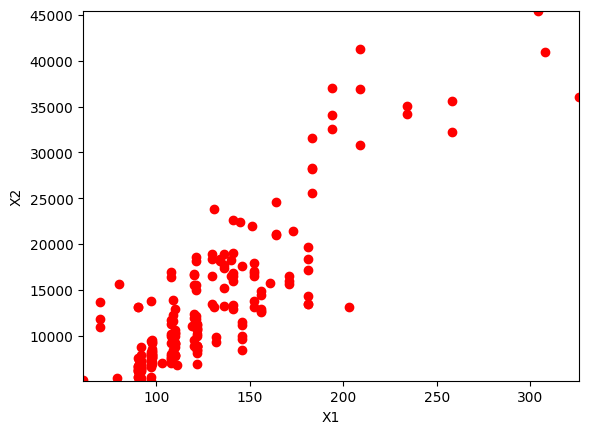

MSE con normalización Standard de la Neurona: nan


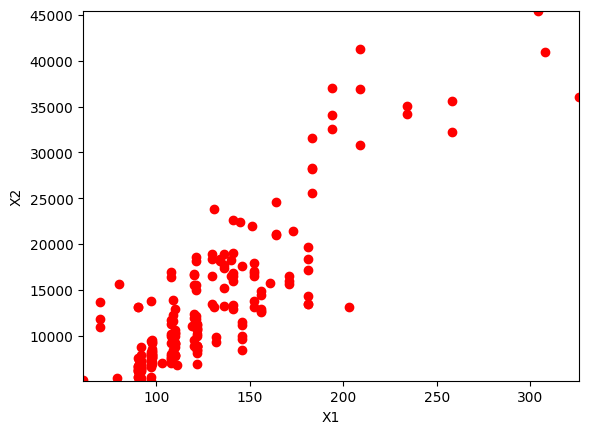

In [142]:
# Usando NeuronaLineal

from sklearn.metrics import mean_squared_error

# model = NeuronaLineal(alpha, iter, cotaE, draw, title)

X = data.drop('price', axis=1).values.reshape(-1, 1)
y = data['price'].values

print(X.shape)
print(y.shape)

# Hyperparametros del Modelo
alpha = 0.01
iter = 100
cotaE = 0.0001
draw = 1
title = ['Engine Size', 'Price']

model = NeuronaLineal(alpha, iter, cotaE, draw, title)

# Sin normalizar no se puede, fallan las predicciones
model.fit(X, y)
mse_neurona = model.errors_[-1]
print(f'MSE con normalización Standard de la Neurona: {mse_neurona}')




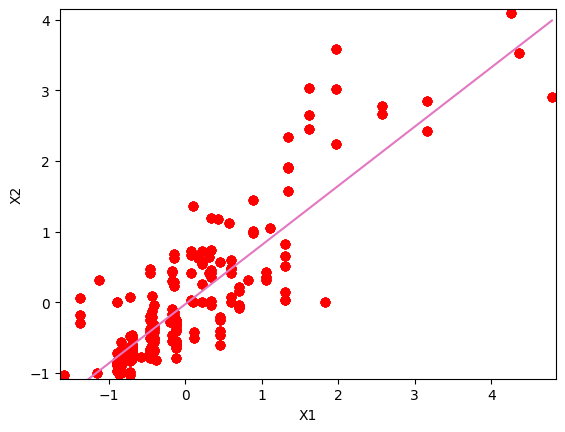

MSE con normalización Standard de la Neurona: [54.01602274]
MSE de Scikit Learn: 0.25869289358252945


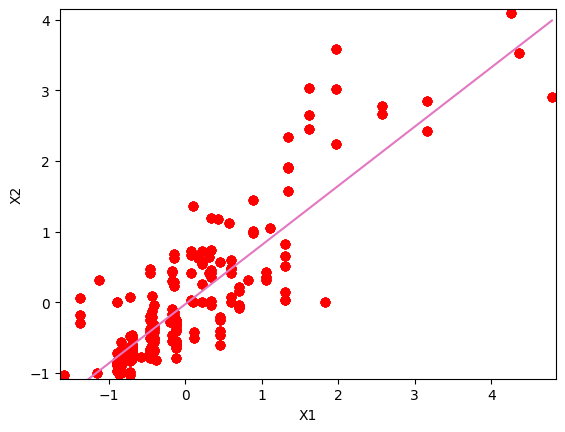

In [141]:
# Normalizacion Standard
scaler_zscore = StandardScaler()
X_zscore = scaler_zscore.fit_transform(X)
y_zscore = scaler_zscore.fit_transform(y.reshape(-1, 1))
model.fit(X_zscore, y_zscore)
mse_neurona = model.errors_[-1]
mse_sklearn = mean_squared_error(y_zscore, model.predict(X_zscore))

print(f'MSE con normalización Standard de la Neurona: {mse_neurona}')
print(f'MSE de Scikit Learn: {mse_sklearn}')

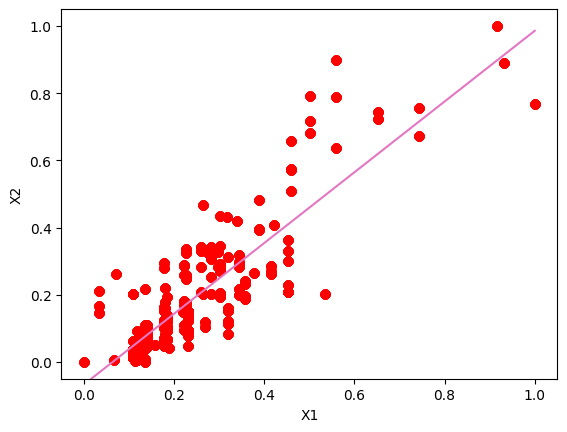

MSE con normalización Standard de la Neurona: [2.00970293]
MSE de Scikit Learn: 0.009821944268904122


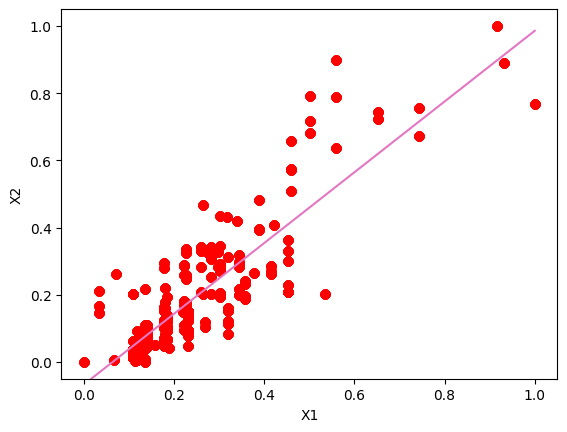

In [140]:
# Normalizacion MinMax
scaler_minmax = MinMaxScaler()
X_minmax = scaler_minmax.fit_transform(X)
y_minmax = scaler_minmax.fit_transform(y.reshape(-1, 1))
model.fit(X_minmax, y_minmax)
mse_neurona = model.errors_[-1]
mse_sklearn = mean_squared_error(y_minmax, model.predict(X_minmax))

print(f'MSE con normalización Standard de la Neurona: {mse_neurona}')
print(f'MSE de Scikit Learn: {mse_sklearn}')

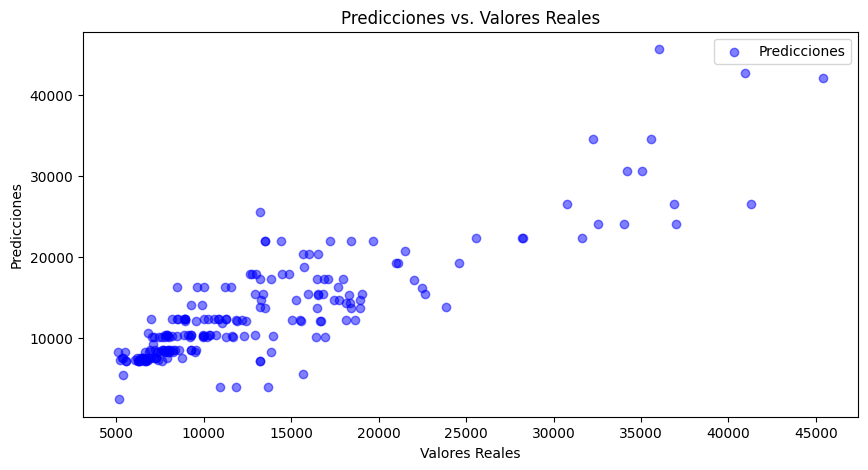

MSE sin normalización: 15858780.53973065


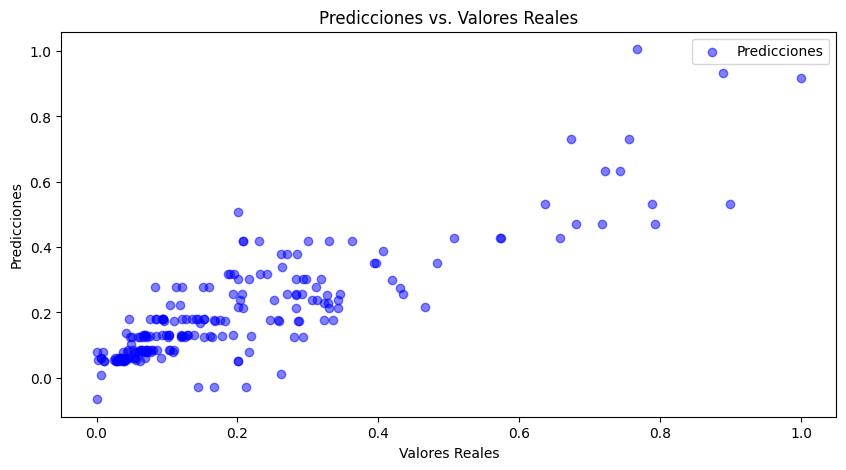

MSE con normalización Min-Max: 0.009773446477278493


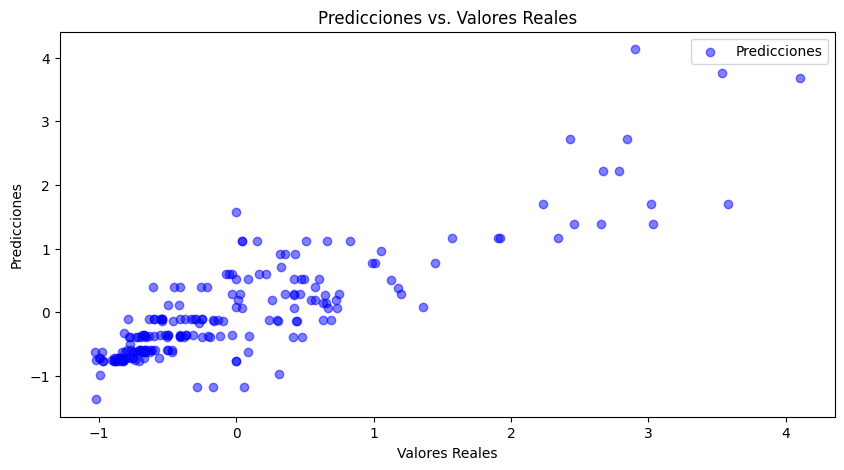

MSE con normalización estándar: 0.2573830705021929


In [138]:
# Usando Scikit Learn

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler


# Asumir que 'price' es la variable objetivo y el resto son características
X = data.drop('price', axis=1)
y = data['price']

# Función para entrenar y evaluar el modelo
def train_and_evaluate(X, y):
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)

    plt.figure(figsize=(10, 5))
    plt.scatter(y, y_pred, alpha=0.5, color='blue', label='Predicciones')
    plt.title('Predicciones vs. Valores Reales')
    plt.xlabel('Valores Reales')
    plt.ylabel('Predicciones')
    plt.legend()
    plt.show()
    return mse

# 1. Sin normalizar los atributos
mse1 = train_and_evaluate(X, y)
print(f'MSE sin normalización: {mse1}')

# 2. Normalizando atributos linealmente (Min-Max Normalization)
scaler_minmax = MinMaxScaler()
X_minmax = scaler_minmax.fit_transform(X)
y_minmax = scaler_minmax.fit_transform(y.values.reshape(-1, 1))
mse2 = train_and_evaluate(X_minmax, y_minmax)
print(f'MSE con normalización Min-Max: {mse2}')

# 3. Normalizando atributos usando media y desviación estándar (Standardization)
scaler_standard = StandardScaler()
X_standard = scaler_standard.fit_transform(X)
y_standard = scaler_standard.fit_transform(y.values.reshape(-1, 1))
mse3 = train_and_evaluate(X_standard, y_standard)
print(f'MSE con normalización estándar: {mse3}')